# **Quantitative Risk Management**

### <font color='MediumVioletRed' style="font-size:20px"><b>Installing and importing Libraries:</b></font>

In [ ]:
# Installing additional libraries
!pip install yfinance
!pip install yahoofinancials

In [25]:
# Standard library
from typing import List

# Third-party libraries
import numpy as np
import pandas as pd
import matplotlib. pyplot as plt
from scipy.stats import norm
import scipy
import yfinance as yf
from yahoofinancials import YahooFinancials
from tabulate import tabulate

### <font color='MediumVioletRed' style="font-size:20px"><b>Question 2:</b>

a) Construct a portfolio A with three value stocks with predefined weigts and portfolio B with hyped stocks (or even crypo). Explain your choice of assets shortly.

b) Calculate 95% VaR for A and B using Monte Carlo method
(MCM) and python and compare them over different number of simulations.

First, let's start with construction our two portfolios.

Explanation for chosen value stocks:

-Qualcomm has relatively stable revenues and earnings  as one of the most important semiconductor companies. It is a leading provider of wireless chip technology for 3G, 4G and 5G. In fact, due to its technology advantage, it counts major smartphone companies such as Apple ) and Samsung Electronics among its top customers.

-First Citizens BancShares recent won the bid to purchase a chunk of collapsed Silicon Valley Bank (SVB) assets. In the deal announced in March, the bank acquired certain Silicon Valley Bank assets at a $16.5 billion discount.Under the leadership of Frank B. Holding Jr., it has grown into one of the top 15 banks in the United States

-One of the most undervalued market sectors is energy. Market participants have shunned thermal coal stocks due to environmental, social and governance (ESG) concerns. As a result, CONSOL Energy trades at a rock-bottom valuation, making it one of the top-value stocks to buy.Over the past decade, ESG has come to the forefront of investing and how investors allocate capital. Amid the energy transition, asset flows have increased towards renewable energy sources, such as solar and wind.

The general idea for value investing is to find companies trading at a discount to their intrinsic value, with the expectation that they'll be likely to outperform the overall stock market over time.

For the **portfolio A** we'll chose the following three stocks:
- Qualcomm
- First Citizens BancShares
- CONSOL Energy

For the **portfolio B**, consistent of the hyped assets, we'll chose some hype stock.Based on a variety of factors - such as current pricing action, future potential, roadmap targets, and mass appeal - here’s 3 hype stock to invest in now for 2023:

- Palantir Technologies Inc
- Plug Power Inc
- NVIDIA Corporation


In [26]:
# Portfolio A (value stocks)
stocks_a = ["QCOM", "FCNCA", "CEIX"]

# Portfolio B (hyped assets)
stocks_b = ["PLTR", "PLUG", "NVDA"]

# Weights for equally weighted portfolio
weights = [1/3]*3

Getting potfolio asset data:

In [27]:
def get_portfolio_data(stocks:List[str], start:str, end:str) -> pd.DataFrame:
  """Gets portfolio asset daily returns for a give period"""
  stock_data = yf.download(stocks, start, end, progress=False)
  stock_data = stock_data['Close']
  returns = stock_data.pct_change()
  return returns

In [28]:
# Time horizon
start = '2021-01-01'
end = '2023-09-01'

# Portfolio 1: asset returns
asset_returns_a = get_portfolio_data(stocks_a, start, end)

# Portfolio 2: asset returns
asset_returns_b = get_portfolio_data(stocks_b, start, end)

Daily returns of portfolio assets:

1. Portfolio A: daily returns for portfolio assets

In [29]:
asset_returns_a.tail()

CEIX     FCNCA      QCOM
Date                                    
2023-08-25  0.009262 -0.005681  0.016680
2023-08-28  0.011918  0.002945  0.012328
2023-08-29  0.010246  0.019536  0.018804
2023-08-30 -0.000233 -0.021158 -0.004482
2023-08-31  0.003265 -0.001842  0.011124

In [30]:
asset_returns_a.describe()

CEIX       FCNCA        QCOM
count  669.000000  669.000000  669.000000
mean     0.004676    0.001716   -0.000084
std      0.041848    0.030585    0.024714
min     -0.215797   -0.075359   -0.088293
25%     -0.020165   -0.012468   -0.014143
50%      0.001770   -0.000084   -0.000681
75%      0.028312    0.014419    0.015038
max      0.141712    0.537396    0.127311

2. Portfolio B: daily returns for portfolio assets

In [31]:
asset_returns_b.tail()

NVDA      PLTR      PLUG
Date                                    
2023-08-25 -0.024278  0.027581  0.017522
2023-08-28  0.017754  0.007571  0.024600
2023-08-29  0.041614  0.051913  0.066026
2023-08-30  0.009839  0.060390 -0.034910
2023-08-31  0.001847 -0.082670 -0.012835

In [32]:
asset_returns_b.describe()

NVDA        PLTR        PLUG
count  669.000000  669.000000  669.000000
mean     0.002574    0.000302   -0.000565
std      0.034663    0.044258    0.054182
min     -0.094726   -0.213080   -0.158140
25%     -0.017689   -0.025346   -0.034288
50%      0.002386   -0.001241   -0.006475
75%      0.021982    0.023560    0.026316
max      0.243696    0.254042    0.351143

Now let's calculate 95% VAR using Monte Carlo method over different simulation and see which of two constructed porfolios is risker based on the VAR metric.

In [33]:
# Time steps (number of days ahead for simulation)
T = 100

# Initial porfolio value
initial_portfolio = 1000

# Number of simulations
simulations = [50, 500, 1000]

In [34]:
def var_mcm(returns: pd.Series, alpha:int = 5) -> str:
  """Calculates VAR using Monte Carlo simulations"""

  if isinstance(returns, pd.Series):
      return np.percentile(returns, alpha)
  else:
      raise TypeError("Expected a pandas data series.")

In [35]:
def simulate_portfolio(returns: pd.DataFrame, weights: List[float], num_of_sim:int = 400, T:int = 100, initial_portfolio:int = 1000000):

  # Portfolio assets' expected returns and cov. matrix
  returns_mean = returns.mean()
  cov_matrix = returns.cov()

  # Placeholder matrix for asset returs
  mean = np.full(shape=(T, len(weights)), fill_value=returns_mean)
  mean = mean.T

  # Placeholder for portfolio mtm value simulation
  # T days ahead over num_of_sim simulations
  portfolio_sims = np.full(shape=(T, num_of_sim), fill_value=0.0)

  # Simulate portfolio movement
  for m in range(0, num_of_sim):
      Z = np.random.normal(size=(T, len(weights)))
      L = np.linalg.cholesky(cov_matrix)
      daily_returns = mean + np.inner(L, Z)
      portfolio_sims[:,m] = np.cumprod(np.inner(weights, daily_returns.T)+1)*initial_portfolio

  return portfolio_sims

1. Portfolio A: 95% VAR using MCM

In [36]:
# Simulating portfolio evolution
portfolio_a_simulations = []
for num_of_sim in simulations:
  portfolio_a_simulations.append(simulate_portfolio(
                                      returns=asset_returns_a,
                                      weights=weights,
                                      num_of_sim=num_of_sim,
                                      T=T,
                                      initial_portfolio=initial_portfolio
                                  ))


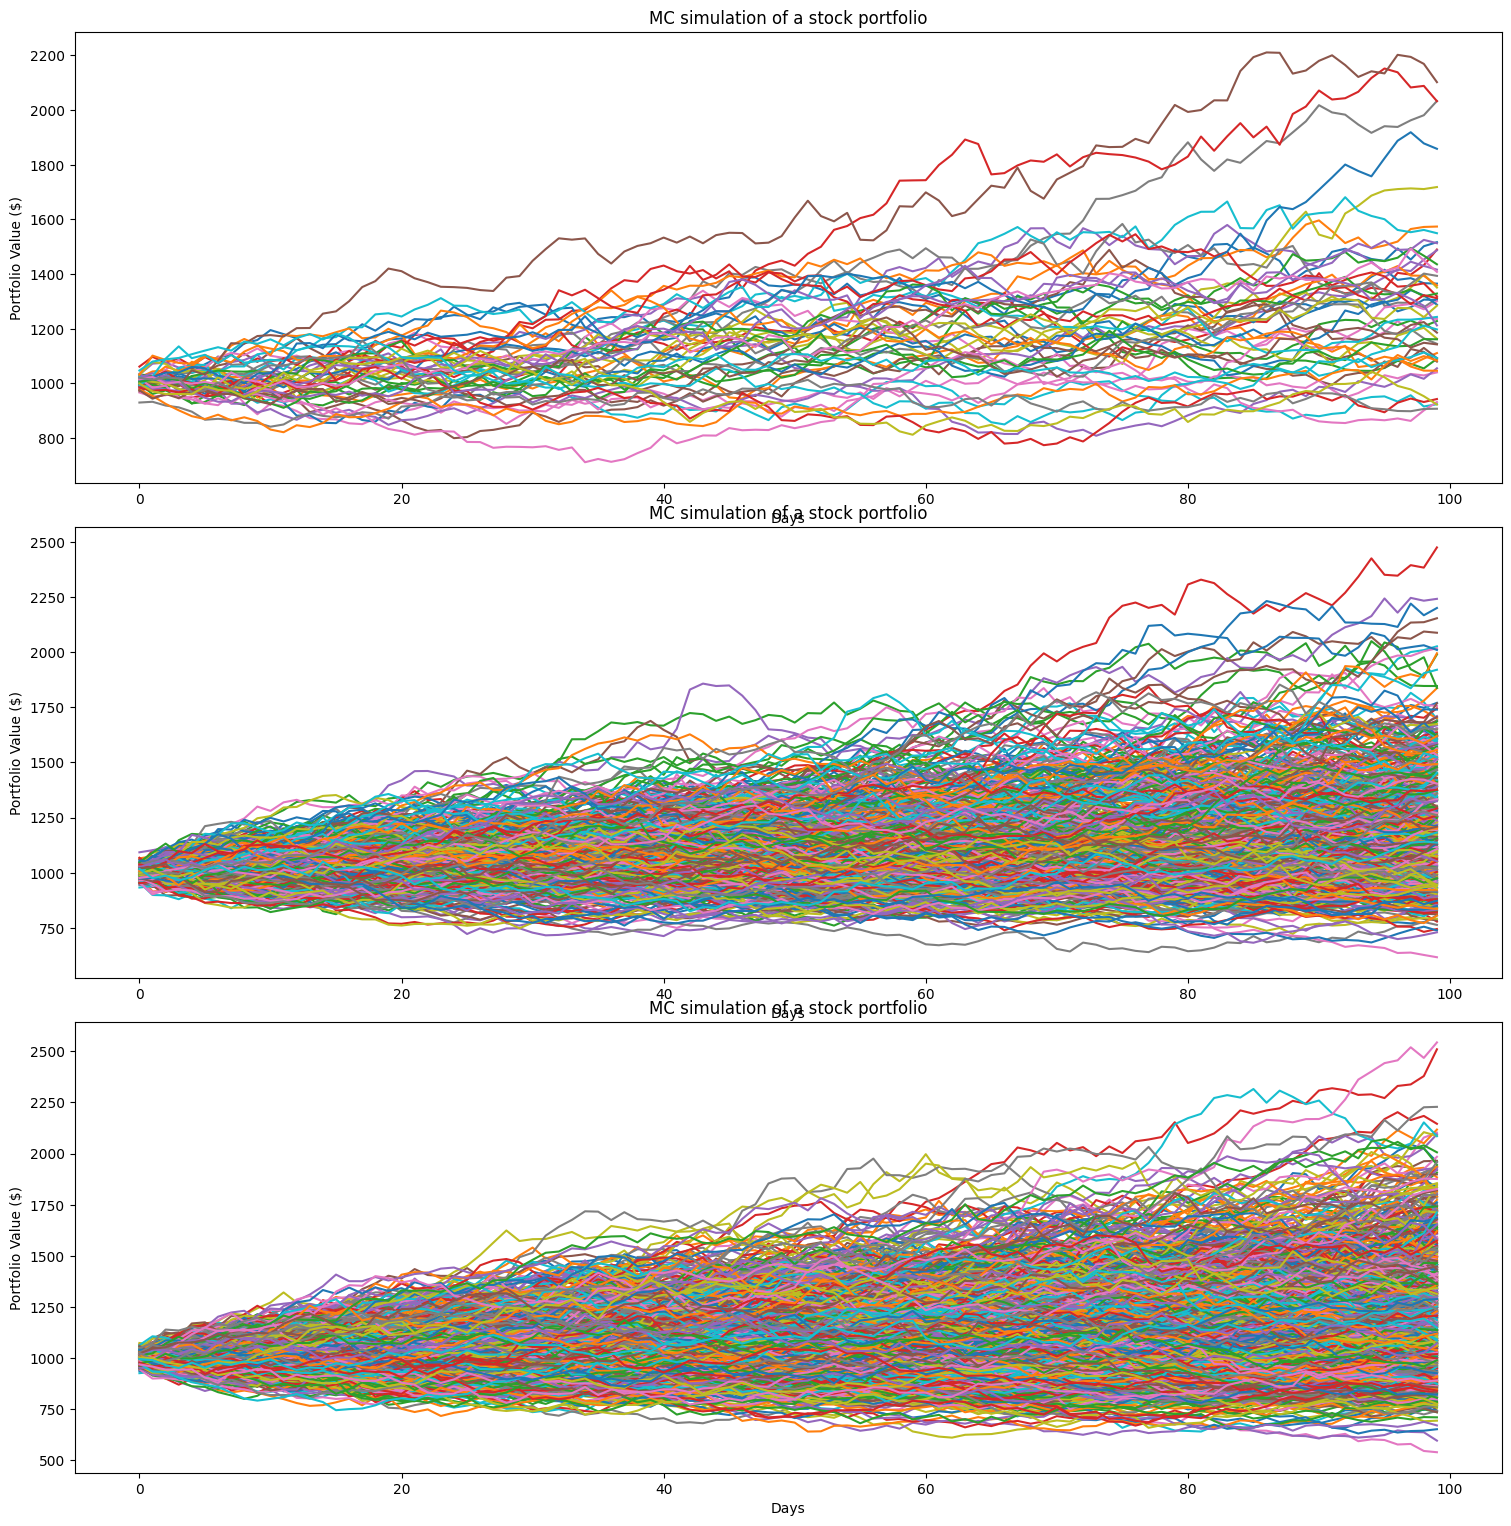

In [37]:
# Ploting portfolio simulation
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(15,15))
fig.tight_layout()

for i, sim in enumerate(portfolio_a_simulations):
  # New subplot for each portfolio simulation
  plt.subplot(3, 1, i + 1,)

  plt.plot(sim)
  plt.ylabel('Portfolio Value ($)')
  plt.xlabel('Days')
  plt.title('MC simulation of a stock portfolio')


In [38]:
# Calculating portfolio VAR

for i, sim in enumerate(portfolio_a_simulations):
  portfolio_last_values = pd.Series(sim[-1,:])

  VaR = (initial_portfolio - var_mcm(portfolio_last_values, alpha=5))

  print(f'95% VaR with {simulations[i]} simulations: ${round(VaR,2)}')

95% VaR with 50 simulations: $72.82
95% VaR with 500 simulations: $148.9
95% VaR with 1000 simulations: $178.75


From the calculated 95% VAR using MCM we can conclude that for the portfolio A (given the initial portfolio value of 1000$) with a confidence of 5% we expect to lose more than \$178.75 based on 1000 simulations in the next 100 days.

2. Portfolio B: 95% VAR using MCM

In [39]:
# Simulating portfolio evolution
portfolio_b_simulations = []
for num_of_sim in simulations:
  portfolio_b_simulations.append(simulate_portfolio(
                                      returns=asset_returns_b,
                                      weights=weights,
                                      num_of_sim=num_of_sim,
                                      T=T,
                                      initial_portfolio=initial_portfolio
                                  ))


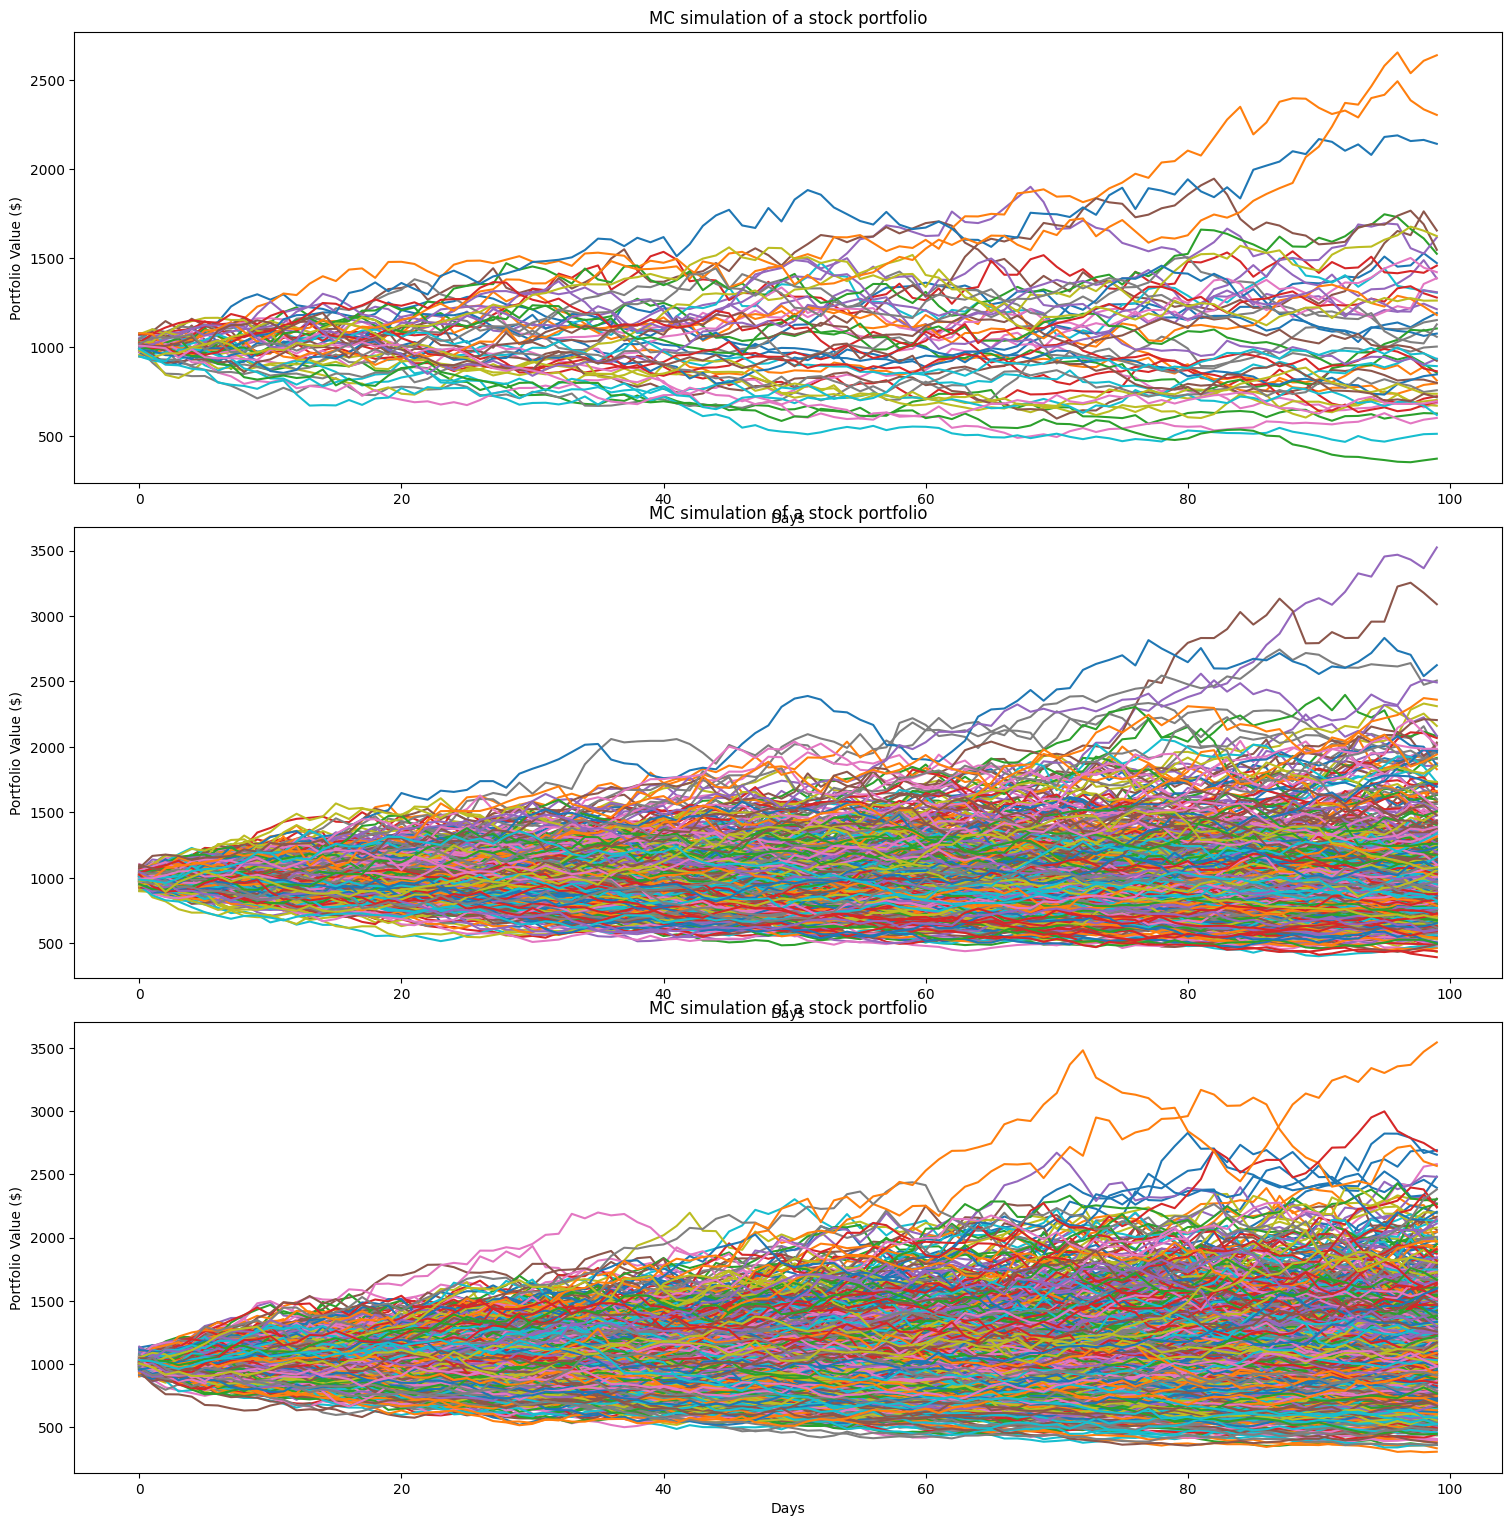

In [40]:
# Ploting portfolio simulation
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(15,15))
fig.tight_layout()

for i, sim in enumerate(portfolio_b_simulations):
  # New subplot for each portfolio simulation
  plt.subplot(3, 1, i + 1,)

  plt.plot(sim)
  plt.ylabel('Portfolio Value ($)')
  plt.xlabel('Days')
  plt.title('MC simulation of a stock portfolio')


In [41]:
# Calculating portfolio VAR

for i, sim in enumerate(portfolio_b_simulations):
  portfolio_last_values = pd.Series(sim[-1,:])

  VaR = (initial_portfolio - var_mcm(portfolio_last_values, alpha=5))

  print(f'95% VaR with {simulations[i]} simulations: ${round(VaR,2)}')

95% VaR with 50 simulations: $393.16
95% VaR with 500 simulations: $425.04
95% VaR with 1000 simulations: $434.28


From the calculated 95% VAR using MCM we can conclude that for the portfolio B (given the initial portfolio value of 1000$) with a confidence of 5% we expect to lose more than \$434.28 based on 1000 simulations in the next 100 days.

Based on different number of Monte Carlo simulations for calculating 95% VAR for both portfolios, we can conclude that hyped assets are much riskier, we could potentially lose over twice more money.